In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from datetime import datetime
%matplotlib inline
plt.style.use('seaborn')

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_10992\2393241504.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
file = 'logins.json'
f = open(file)
logins = json.loads(f.read())
f.close()

In [4]:
#inspect keys
print("Keys:", logins.keys())
pprint(logins)

Keys: dict_keys(['login_time'])
{'login_time': ['1970-01-01 20:13:18',
                '1970-01-01 20:16:10',
                '1970-01-01 20:16:37',
                '1970-01-01 20:16:36',
                '1970-01-01 20:26:21',
                '1970-01-01 20:21:41',
                '1970-01-01 20:12:16',
                '1970-01-01 20:35:47',
                '1970-01-01 20:35:38',
                '1970-01-01 20:47:52',
                '1970-01-01 20:26:05',
                '1970-01-01 20:31:03',
                '1970-01-01 20:34:46',
                '1970-01-01 20:36:34',
                '1970-01-01 20:39:25',
                '1970-01-01 20:40:37',
                '1970-01-01 20:34:58',
                '1970-01-01 20:43:59',
                '1970-01-01 20:47:46',
                '1970-01-01 20:46:34',
                '1970-01-01 20:56:07',
                '1970-01-01 20:49:12',
                '1970-01-01 20:59:06',
                '1970-01-01 20:59:59',
                '1970-01-01 21:1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
print(len(logins['login_time']))

93142


In [78]:
#create dataframe
df_logins = pd.DataFrame(pd.to_datetime(logins['login_time']),columns=['login_time'])
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [79]:
# Resample the DataFrame in 15-minute intervals and count the occurrences
df_logins['count'] = 1
#set  the index 
df_logins.set_index('login_time',inplace = True)




In [80]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB



###### Lets draw a graph to better understand the data. We see good number of spike, which means on certain day and time logins to the sytem spike up. Graph also shows there could no login for a day too. 

<Axes: xlabel='login_time'>

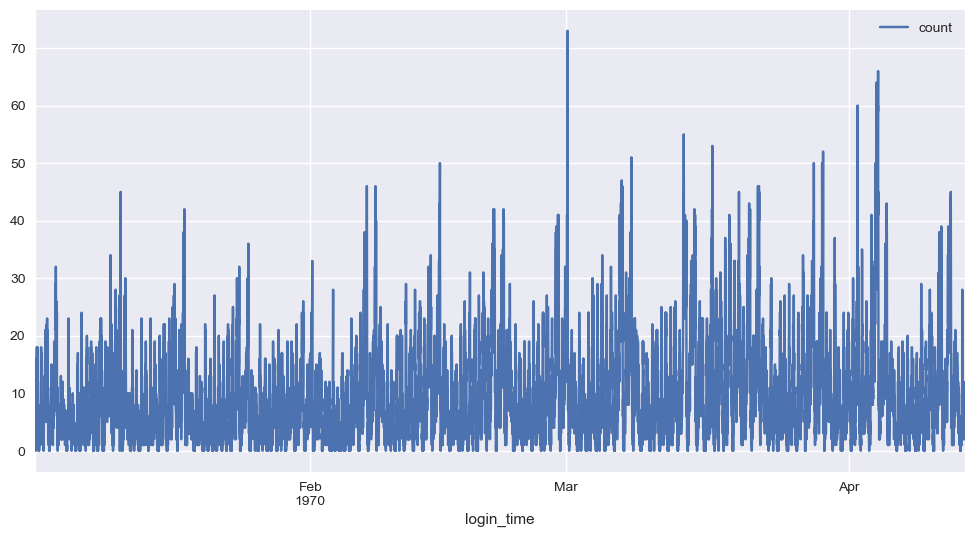

In [81]:
df_count = df_logins.resample('15min').sum()
df_count.plot(kind='line',figsize=(12,6))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


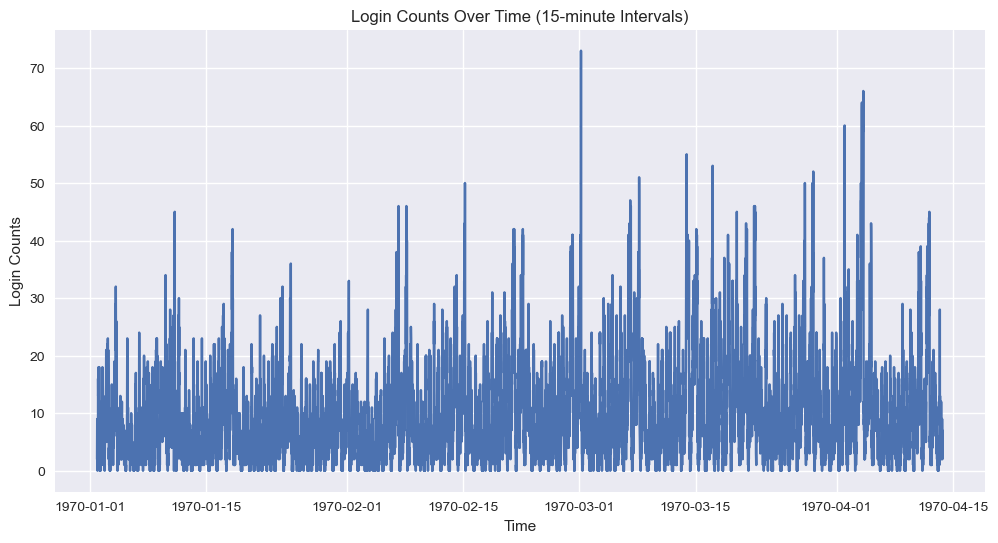

In [84]:
# Plot the time series
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_count['count'])
plt.title('Login Counts Over Time (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.show()

###### The Median number of logins per 15 mins is 7 or fewer logins. Maximum number of logins in 15 mins interval is 73.

In [86]:
df_count.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


Lets try to split of time data into days, hours and then analyse further

In [100]:
df_count = df_count.assign(month_day=df_count.index.day)
df_count = df_count.assign(weekday=df_count.index.day_name())
df_count.head()

,count,month_day,weekday
login_time,,,
1970-01-01 20:00:00,2,1,Thursday
1970-01-01 20:15:00,6,1,Thursday
1970-01-01 20:30:00,9,1,Thursday
1970-01-01 20:45:00,7,1,Thursday
1970-01-01 21:00:00,1,1,Thursday


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


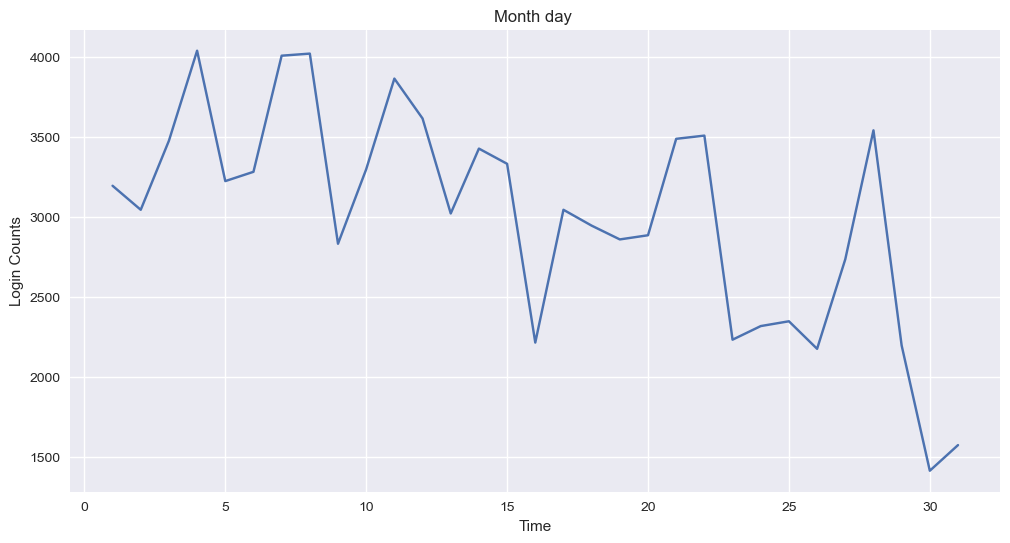

In [102]:
# lets group by month_day as well as week day to see if we see spike on specific weekday or month day
# Weekends seems to have spike in the logins

month_day  = df_count.groupby('month_day')['count'].sum()


plt.figure(figsize=(12, 6))
sns.lineplot(data=month_day)
plt.title('Month day ')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


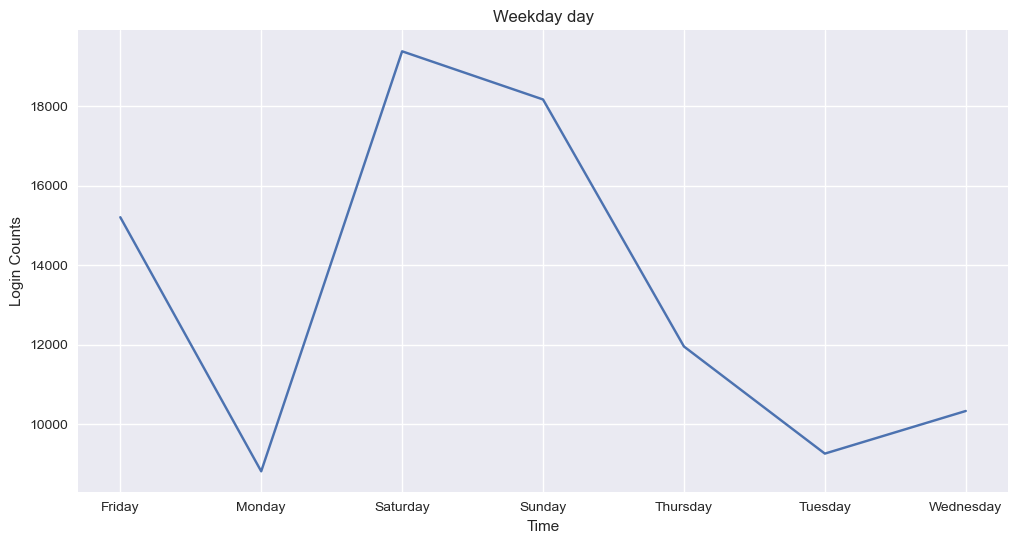

In [101]:
weekday = df_count.groupby('weekday')['count'].sum()

plt.figure(figsize=(12, 6))

sns.lineplot(data=weekday)

plt.title('Weekday day')
plt.xlabel('Time')
plt.ylabel('Login Counts')
plt.legend()
plt.show()

<Axes: xlabel='login_time'>

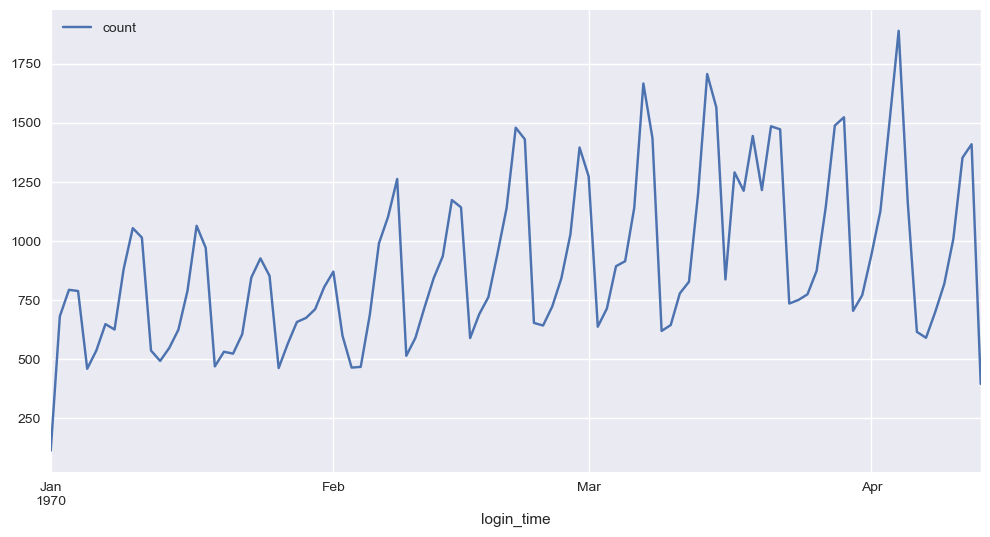

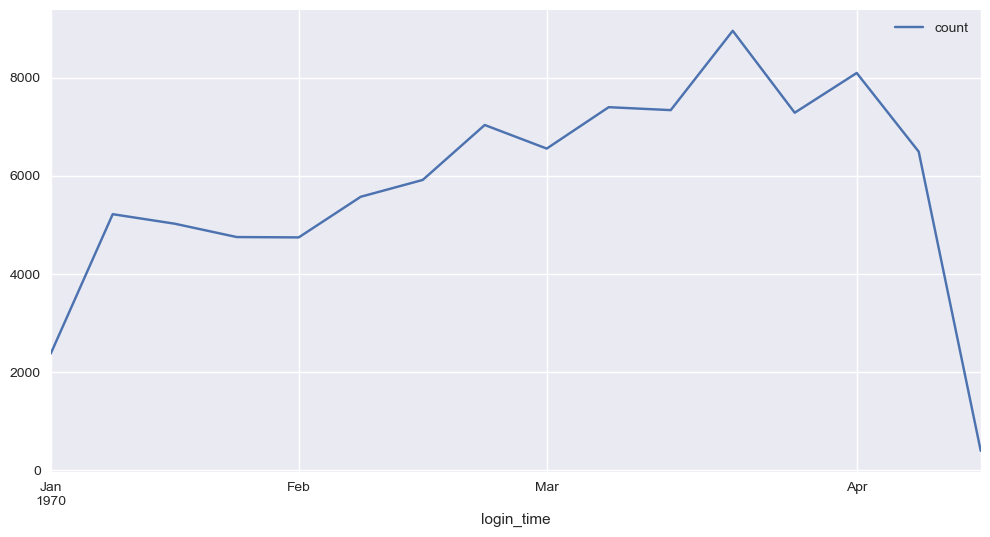

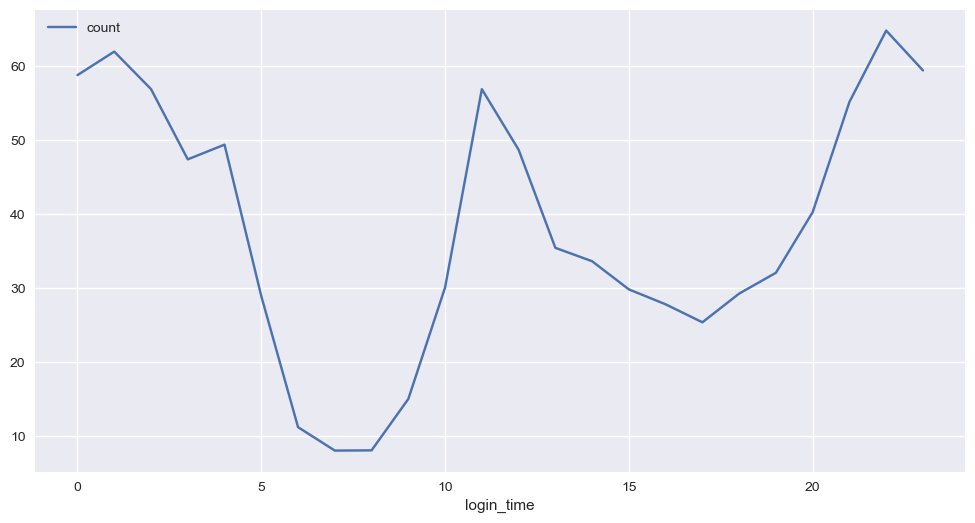

In [142]:
# lets resample day by day and week to see whether trend is going upward or downward
# from both week and day's graph login count shows upward trend , but at the end of april number of logins just dropped.
# when login hours are considered over all the time period, we see that user logins rate spike in night and mid afternoon
df_day = df_logins.resample('1D').sum()
df_day.plot(kind='line',figsize=(12,6))

df_week = df_logins.resample('1W').sum()
df_week.plot(kind='line',figsize=(12,6))


df_hour = df_logins.resample('1H').sum()
df_hourly_average = df_hour.groupby(df_hour.index.hour).mean()
df_hourly_average.plot(kind='line',figsize=(12,6))


Lets use linear plot to confirm, that indeed we have upward trend in logins. If there was indeed upward trend, as days passes login count should steadily increase

C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


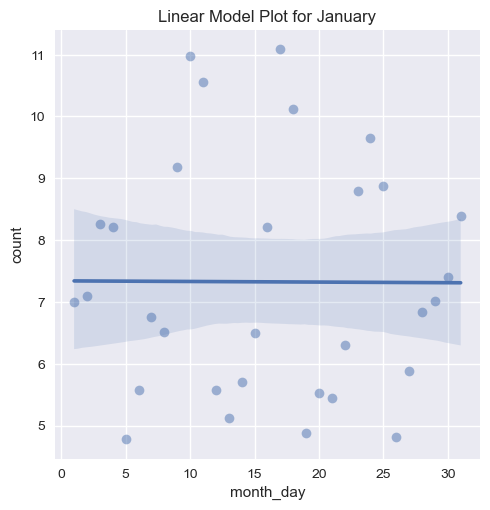

In [135]:
df_january = df_count[df_count.index.month == 1]
df_daily = df_january.groupby(['weekday', df_january.index.date]).mean().reset_index()

# Create a linear model plot
sns.lmplot(x='month_day', y='count', data=df_daily, scatter_kws={'alpha': 0.5})
plt.title('Linear Model Plot for January')
plt.show()


C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


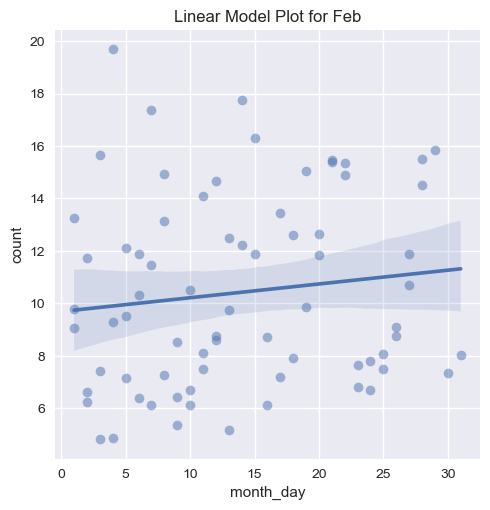

In [138]:
df_feb = df_count[df_count.index.month != 1]
df_daily = df_feb.groupby(['weekday', df_feb.index.date]).mean().reset_index()

# Create a linear model plot
sns.lmplot(x='month_day', y='count', data=df_daily, scatter_kws={'alpha': 0.5})
plt.title('Linear Model Plot for all other months')
plt.show()

We do see upward trend in Feb, March, April months but January month as saturation logins